In [3]:
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as wb

In [4]:
from datetime import date
from datetime import datetime

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
REPSOL = wb.DataReader("REP.MC", 
                       start='2020-1-1', 
                       end=date.today(), 
                       data_source='yahoo')
Valor=REPSOL
Nombre='REPSOL'
Valor.rename(columns={'High': Nombre+('High'),'Low': Nombre+('Low'),'Open': Nombre+('Open'),
                      'Close': Nombre+('Close'),'Volume': Nombre+('Volume'),'Adj Close': Nombre+('Adj Close')},inplace=True)
Valor.head()

,REPSOLHigh,REPSOLLow,REPSOLOpen,REPSOLClose,REPSOLVolume,REPSOLAdj Close
Date,,,,,,
2020-01-02,14.135,13.975,14.030,14.065,5576733.0,12.829264
2020-01-03,14.280,14.060,14.105,14.240,4769535.0,12.988888
2020-01-06,14.475,14.260,14.260,14.350,3960659.0,13.089224
2020-01-07,14.420,14.230,14.365,14.230,6809406.0,12.979767
2020-01-08,14.375,14.155,14.230,14.360,4661762.0,13.098345


In [12]:
Valor.to_excel(Nombre+'_Sample.xlsx',sheet_name='Sheet1')

In [15]:
Valor.to_csv(Nombre+'_Sample.csv')

In [16]:
#AAPL_IEX = wb.DataReader('AAPL', data_source='iex', api_key="pk_8ddda04e349149c99968b7e76dc1b622",start='2015-1-1',end='2016-1-1')

In [17]:
Valor.resample(rule='A').mean()

,REPSOLHigh,REPSOLLow,REPSOLOpen,REPSOLClose,REPSOLVolume,REPSOLAdj Close
Date,,,,,,
2020-12-31,8.575646,8.258483,8.441377,8.397926,1.221825e+07,7.886751
2021-12-31,9.567764,9.270836,9.397036,9.441182,9.109119e+06,9.441182


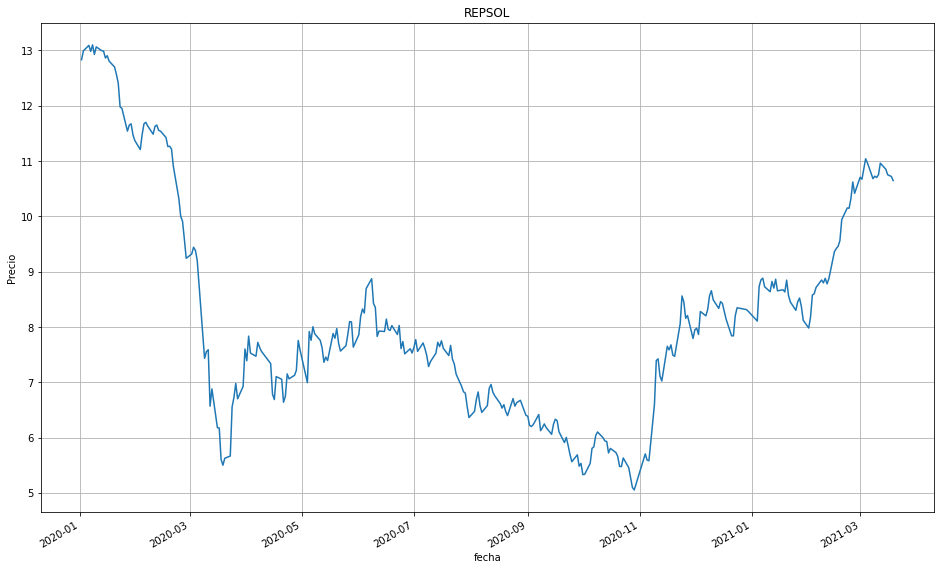

In [18]:

Valor[Nombre+'Adj Close'].plot(figsize=(16,10))
plt.xlabel('fecha')
plt.ylabel('Precio')
plt.title(Nombre)
plt.grid()


In [19]:
#REPSOL.rolling(90).mean().head(10)

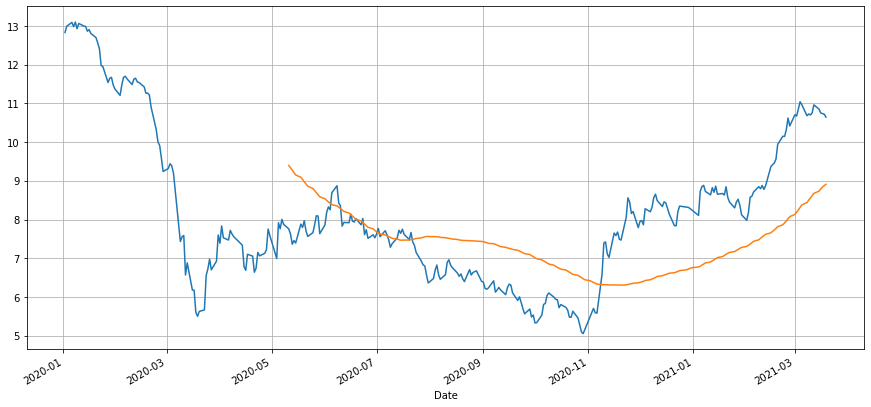

In [20]:
Valor[Nombre+'Adj Close'].plot()
Valor.rolling(window=90).mean()[Nombre+'Adj Close'].plot(figsize=(15,7))
plt.grid()

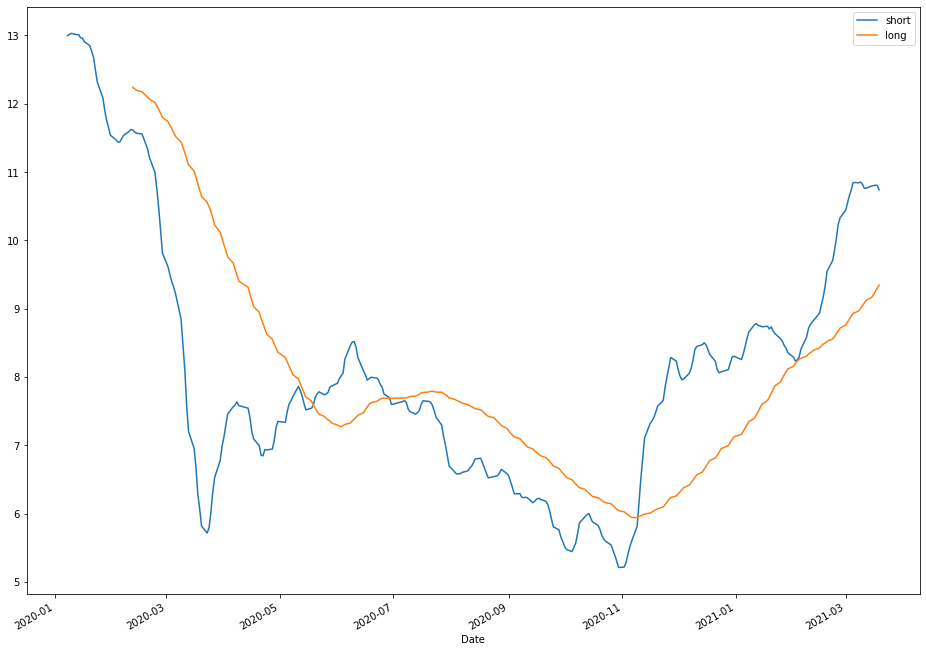

In [21]:
df_filled = Valor.asfreq('D', method='ffill')
df_last = Valor[Nombre+'Adj Close']

series_short = df_last.rolling(window=5, min_periods=5).mean()
series_long = df_last.rolling(window=60, min_periods=30).mean()

df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize=(16, 12));

<AxesSubplot:xlabel='Date'>

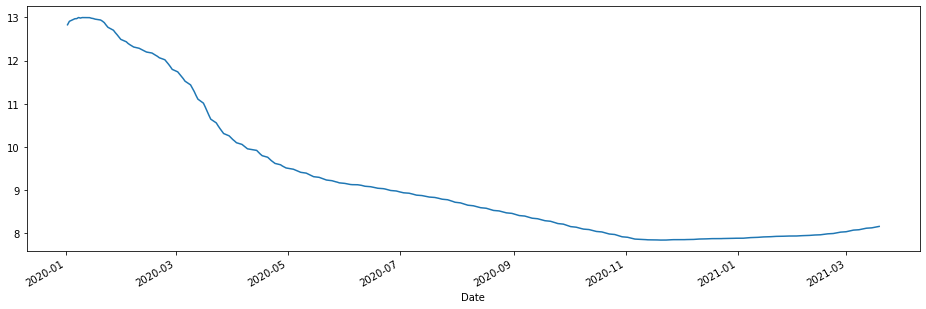

In [22]:
Valor[Nombre+'Adj Close'].expanding(min_periods=1).mean().plot(figsize=(16,5))

In [23]:
Valor.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 312 entries, 2020-01-02 to 2021-03-19
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   REPSOLHigh       312 non-null    float64
 1   REPSOLLow        312 non-null    float64
 2   REPSOLOpen       312 non-null    float64
 3   REPSOLClose      312 non-null    float64
 4   REPSOLVolume     312 non-null    float64
 5   REPSOLAdj Close  312 non-null    float64
dtypes: float64(6)
memory usage: 17.1 KB


<ipython-input-24-2d6328d82594>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(Valor[Nombre+'Adj Close'], freq=12)


<Figure size 432x288 with 0 Axes>

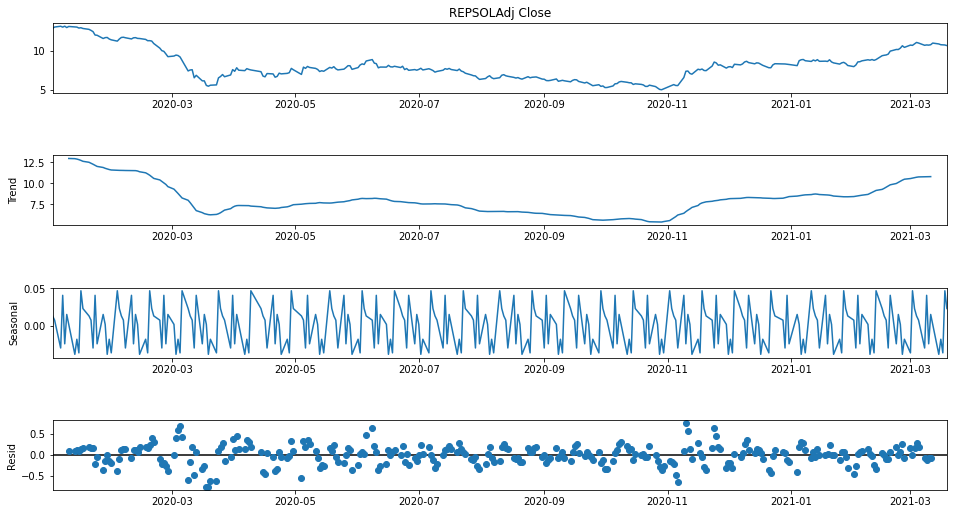

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Valor[Nombre+'Adj Close'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

Dicky Fuller test We can use the Augmented Dickey-Fuller unit root test.

In statistics and econometrics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.

Basically, we are trying to whether to accept the Null Hypothesis H0 (that the time series has a unit root, indicating it is non-stationary) or reject H0 and go with the Alternative Hypothesis (that the time series has no unit root and is stationary).

We end up deciding this based on the p-value return.

A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

Let's run the Augmented Dickey-Fuller test on our data:

In [25]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
adf_check(Valor[Nombre+'Adj Close'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.523153769398295
p-value : 0.10994191393741048
#Lags Used : 8
Number of Observations Used : 303
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Important Note!
** We have now realized that our data is seasonal (it is also pretty obvious from the plot itself). This means we need to use Seasonal ARIMA on our model. If our data was not seasonal, it means we could use just ARIMA on it. We will take this into account when differencing our data! Typically financial stock data won't be seasonal, but that is kind of the point of this section, to show you common methods, that won't work well on stock finance data!**

Differencing
The first difference of a time series is the series of changes from one period to the next. We can do this easily with pandas. You can continue to take the second difference, third difference, and so on until your data is stationary.

In [28]:
Valor[Nombre+'Adj Close First Difference'] = Valor[Nombre+'Adj Close'] - Valor[Nombre+'Adj Close'].shift(1)

In [29]:
Valor[Nombre+'Adj Close First Difference'].head()

Date
2020-01-02         NaN
2020-01-03    0.159624
2020-01-06    0.100336
2020-01-07   -0.109457
2020-01-08    0.118578
Name: REPSOLAdj Close First Difference, dtype: float64

In [21]:
adf_check(Valor[Nombre+'Adj Close First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -8.179001292285417
p-value : 8.227959690061054e-13
#Lags Used : 21
Number of Observations Used : 1675
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

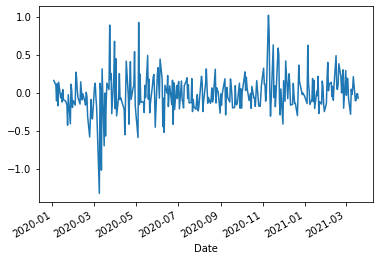

In [30]:
Valor[Nombre+'Adj Close First Difference'].plot()

Autocorrelation and Partial Autocorrelation Plots
An autocorrelation plot (also known as a Correlogram ) shows the correlation of the series with itself, lagged by x time units. So the y axis is the correlation and the x axis is the number of time units of lag.

So imagine taking your time series of length T, copying it, and deleting the first observation of copy #1 and the last observation of copy #2. Now you have two series of length T−1 for which you calculate a correlation coefficient. This is the value of of the vertical axis at x=1x=1 in your plots. It represents the correlation of the series lagged by one time unit. You go on and do this for all possible time lags x and this defines the plot.

You will run these plots on your differenced/stationary data. There is a lot of great information for identifying and interpreting ACF and PACF here and here.

Autocorrelation Interpretation
The actual interpretation and how it relates to ARIMA models can get a bit complicated, but there are some basic common methods we can use for the ARIMA model. Our main priority here is to try to figure out whether we will use the AR or MA components for the ARIMA model (or both!) as well as how many lags we should use. In general you would use either AR or MA, using both is less common.

If the autocorrelation plot shows positive autocorrelation at the first lag (lag-1), then it suggests to use the AR terms in relation to the lag

If the autocorrelation plot shows negative autocorrelation at the first lag, then it suggests using MA terms.

Important Note! 
Here we will be showing running the ACF and PACF on multiple differenced data sets that have been made stationary in different ways, typically you would just choose a single stationary data set and continue all the way through with that.

The reason we use two here is to show you the two typical types of behaviour you would see when using ACF.

In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

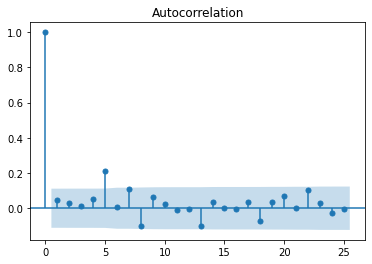

In [32]:
fig_first = plot_acf(Valor[Nombre+"Adj Close First Difference"].dropna())

In [33]:
Valor.head()

,REPSOLHigh,REPSOLLow,REPSOLOpen,REPSOLClose,REPSOLVolume,REPSOLAdj Close,REPSOLAdj Close First Difference
Date,,,,,,,
2020-01-02,14.135,13.975,14.030,14.065,5576733.0,12.829264,NaN
2020-01-03,14.280,14.060,14.105,14.240,4769535.0,12.988888,0.159624
2020-01-06,14.475,14.260,14.260,14.350,3960659.0,13.089224,0.100336
2020-01-07,14.420,14.230,14.365,14.230,6809406.0,12.979767,-0.109457
2020-01-08,14.375,14.155,14.230,14.360,4661762.0,13.098345,0.118578


RETORNO De INVERSION

In [34]:
Valor[Nombre+'simple_return'] = (Valor[Nombre+'Close'] / Valor[Nombre+'Close'].shift(1)) - 1
print (Valor[Nombre+'simple_return'].head(10))

Date
2020-01-02         NaN
2020-01-03    0.012442
2020-01-06    0.007725
2020-01-07   -0.008362
2020-01-08    0.009136
2020-01-09   -0.013231
2020-01-10    0.010586
2020-01-13   -0.005237
2020-01-14   -0.000702
2020-01-15   -0.009484
Name: REPSOLsimple_return, dtype: float64


In [35]:
Valor.index=pd.to_datetime(Valor.index)

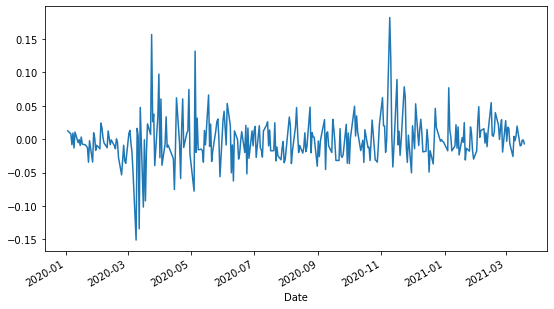

In [36]:
Valor[Nombre+'simple_return'].plot(figsize=(9,5))
plt.show()

In [29]:
MSFT_average_return=Valor[Nombre+'simple_return'].mean()
MSFT_average_return

-0.00039960556546829137

In [30]:
MSFT_average_return=Valor[Nombre+'simple_return'].mean()*250
MSFT_average_return

-0.09990139136707284

In [31]:
print(str(MSFT_average_return * 100)+ '%')

-9.990139136707283%


GESTION DE RIESGOS




In [32]:
#Valor.index

In [40]:
NATURGY = wb.DataReader("NTGY.MC", 
                       start='2020-1-1', 
                       end=date.today(), 
                       data_source='yahoo')
Valor2=NATURGY
Nombre2='NATURGY'
Valor2.rename(columns={'High': Nombre2+('High'),'Low': Nombre2+('Low'),'Open': Nombre2+('Open'),
                      'Close': Nombre2+('Close'),'Volume': Nombre2+('Volume'),'Adj Close': Nombre2+('Adj Close')},inplace=True)
Valor2.head()


,NATURGYHigh,NATURGYLow,NATURGYOpen,NATURGYClose,NATURGYVolume,NATURGYAdj Close
Date,,,,,,
2020-01-02,22.740000,22.440001,22.469999,22.700001,894191.0,20.259424
2020-01-03,22.660000,22.510000,22.600000,22.650000,696060.0,20.214802
2020-01-06,22.719999,22.510000,22.549999,22.530001,695452.0,20.107704
2020-01-07,22.629999,22.209999,22.610001,22.270000,1280404.0,19.875658
2020-01-08,22.360001,22.160000,22.240000,22.190001,1710447.0,19.804258


In [41]:
Valor2.to_excel(Nombre2+'_Sample.xlsx',sheet_name='Sheet1')

In [42]:
Valor2.to_csv(Nombre2+'_Sample.csv')

In [43]:
security_data=pd.concat([Valor,Valor2],axis=1)

In [44]:
security_data.head()


,REPSOLHigh,REPSOLLow,REPSOLOpen,REPSOLClose,REPSOLVolume,REPSOLAdj Close,REPSOLAdj Close First Difference,REPSOLsimple_return,NATURGYHigh,NATURGYLow,NATURGYOpen,NATURGYClose,NATURGYVolume,NATURGYAdj Close
Date,,,,,,,,,,,,,,
2020-01-02,14.135,13.975,14.030,14.065,5576733.0,12.829264,NaN,NaN,22.740000,22.440001,22.469999,22.700001,894191.0,20.259424
2020-01-03,14.280,14.060,14.105,14.240,4769535.0,12.988888,0.159624,0.012442,22.660000,22.510000,22.600000,22.650000,696060.0,20.214802
2020-01-06,14.475,14.260,14.260,14.350,3960659.0,13.089224,0.100336,0.007725,22.719999,22.510000,22.549999,22.530001,695452.0,20.107704
2020-01-07,14.420,14.230,14.365,14.230,6809406.0,12.979767,-0.109457,-0.008362,22.629999,22.209999,22.610001,22.270000,1280404.0,19.875658
2020-01-08,14.375,14.155,14.230,14.360,4661762.0,13.098345,0.118578,0.009136,22.360001,22.160000,22.240000,22.190001,1710447.0,19.804258


In [45]:
security_data=security_data[[Nombre+'Adj Close',Nombre2+'Adj Close']]

In [46]:
security_data.head()

,REPSOLAdj Close,NATURGYAdj Close
Date,,
2020-01-02,12.829264,20.259424
2020-01-03,12.988888,20.214802
2020-01-06,13.089224,20.107704
2020-01-07,12.979767,19.875658
2020-01-08,13.098345,19.804258


In [47]:
security_data.tail()

,REPSOLAdj Close,NATURGYAdj Close
Date,,
2021-03-15,10.850,20.770000
2021-03-16,10.750,20.760000
2021-03-17,10.735,21.010000
2021-03-18,10.720,20.940001
2021-03-19,10.645,21.059999


In [48]:
security_returns = np.log(security_data / security_data.shift(1))

In [49]:
security_returns.head(20)

,REPSOLAdj Close,NATURGYAdj Close
Date,,
2020-01-02,NaN,NaN
2020-01-03,0.012365,-0.002205
2020-01-06,0.007695,-0.005312
2020-01-07,-0.008398,-0.011607
2020-01-08,0.009094,-0.003599
2020-01-09,-0.013319,0.003599
2020-01-10,0.010530,-0.004952
2020-01-13,-0.005251,0.014782
2020-01-14,-0.000702,0.002664


In [50]:
security_returns[Nombre+'Adj Close'].mean()

-0.0006001236196062135

In [51]:
security_returns[Nombre+'Adj Close'].mean()*250

-0.15003090490155338

In [52]:
security_returns[Nombre+'Adj Close'].std()

0.034281800677510084

In [53]:
security_returns[Nombre+'Adj Close'].std()*250**0.5

0.5420428621641767

In [54]:
security_returns[Nombre2+'Adj Close'].mean()

0.00012461544369703892

In [55]:
security_returns[Nombre2+'Adj Close'].mean()*250

0.03115386092425973

In [56]:
security_returns[Nombre2+'Adj Close'].std()

0.024534008646778342

In [57]:
security_returns[Nombre2+'Adj Close'].std()*250**0.5

0.38791673729042503

In [58]:
print(security_returns[Nombre+'Adj Close'].mean()*250)
print(security_returns[Nombre2+'Adj Close'].mean()*250)

-0.15003090490155338
0.03115386092425973


In [59]:
security_returns.head(5)

,REPSOLAdj Close,NATURGYAdj Close
Date,,
2020-01-02,NaN,NaN
2020-01-03,0.012365,-0.002205
2020-01-06,0.007695,-0.005312
2020-01-07,-0.008398,-0.011607
2020-01-08,0.009094,-0.003599


In [62]:
security_returns[[Nombre+'Adj Close',Nombre2+'Adj Close']].mean()*250

REPSOLAdj Close    -0.150031
NATURGYAdj Close    0.031154
dtype: float64

In [63]:
security_returns[[Nombre+'Adj Close',Nombre2+'Adj Close']].mean()*250**0.5

REPSOLAdj Close    -0.009489
NATURGYAdj Close    0.001970
dtype: float64

In [64]:
security_returns = np.log(security_data / security_data.shift(1))

In [65]:
Valor_varianza = security_returns[Nombre+'Adj Close'].var() 
Valor_varianza

0.001175241857692531

In [66]:
Valor2_varianza = security_returns[Nombre2+'Adj Close'].var() 
Valor2_varianza

0.0006019175802801945

In [67]:
Valor_varianza = security_returns[Nombre+'Adj Close'].var() *250
Valor_varianza

0.29381046442313274

In [68]:
Valor2_varianza = security_returns[Nombre2+'Adj Close'].var() * 250
Valor2_varianza

0.15047939507004865

In [69]:
cov_matrix = security_returns.cov()*250
cov_matrix

,REPSOLAdj Close,NATURGYAdj Close
REPSOLAdj Close,0.293810,0.107952
NATURGYAdj Close,0.107952,0.150479


In [70]:
corr_matrix = security_returns.corr()
corr_matrix

,REPSOLAdj Close,NATURGYAdj Close
REPSOLAdj Close,1.000000,0.513401
NATURGYAdj Close,0.513401,1.000000
